<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON1_Trading_Strategy_Functions_v12C_START_END.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:


# @title Markov Markowitz Company / Asset List Generator
# @markdown ---
# @markdown Input parameters for asset selection

LOOKBACK_YEARS = 1 # @param {type:"number"}
START = "2023-08-23" # @param {type:"date"}
END = "2023-09-12" # @param {type:"date"}
WIN_TR = 0.6  # @param {type: "number"}
WIN_US = 0.40  # @param {type: "number"}
RETURN_THRESHOLD = 0.00  # @param {type: "number"}
OVERNIGHT_STRATEGY = True  # @param {type: "boolean"}
# @markdown Generate asset list for:
BIST_30 = True # @param {type:"boolean"}
BIST_100 = False # @param {type:"boolean"}
DOW_30 = False # @param {type:"boolean"}
SP_500 = False # @param {type:"boolean"}
GRAPHICS = True # @param {type:"boolean"}
# @markdown ---



In [99]:
print("Selected = ", LOOKBACK_YEARS, WIN_TR, WIN_US)

Selected =  1 0.6 0.4


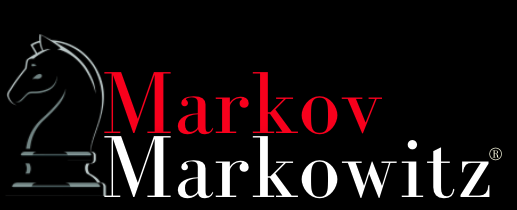

In [100]:
# show current directory
import os
from pathlib import Path
from IPython.display import display
from PIL import Image

from google.colab import files

filename = "MARKOVMAR5.png"

my_file = Path(f"/content/{filename}")
if my_file.is_file():
    pass
else:
    files.upload_file(filename)

display(Image.open(filename))


## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com



--------------------------------------------------

# Portfolio Construction with Maximum Win Probability and Maximum Sharpe Ratio Portfolio upon **BIST**100 Assets("**Borsa ISTanbul", Turkey**) using:

## 1. **Markov Chain Probabilistic Model**

A Markov Chain is a probabilistic model used to represent a system that undergoes a sequence of states over time, where the probability of transitioning from one state to another depends only on the current state. It's named after Andrey Markov, a Russian mathematician who pioneered its development. This model is defined by a set of states and transition probabilities between these states. Each state represents a possible condition or situation of the system, and the transitions between states are governed by probabilities.

The key assumption of a Markov Chain is the Markov property, which states that the future state of the system depends only on its current state and is independent of its past states. In other words, the system has no memory of its history beyond its current state. Markov Chains are widely used in various fields, including finance, natural language processing, and biology, for modeling dynamic processes like stock price movements, text generation, and genetic mutations. They are often employed to make predictions, simulate system behavior, and analyze the long-term statistical properties of a system as it evolves through different states.



<a href = "https://doi.org/10.1017/CBO9780511810633">  Norris </a>, J. R. (1998). Markov Chains. Cambridge University Press.

<a href = "https://www.cs.ubc.ca/~murphyk/Bayes/rabiner.pdf"> Rabiner </a>, L. R. (1989). A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition.
Proceedings of the IEEE, 77(2), 257-286.



## 2. **Markowitz's Modern Portfolio Theory**

Modern Portfolio Theory (MPT) is a Nobel Prize-winning economic theory.
It explains how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk. <a href = "https://en.wikipedia.org/wiki/Harry_Markowitz">Harry Markowitz</a> pioneered this theory in his paper <a href = "https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.1952.tb01525.x">Portfolio Selection</a> , which was published in the Journal of Finance in 1952. He was later awarded a Nobel Prize for his work on modern portfolio theory. Modern Portfolio Theory suggests diversification of all your securities and asset classes and not putting all your eggs in one basket. It emphasises the importance of portfolios, diversification, risk and the connections among different kinds of securities.


## Table of contents
1. [Volatility](#volat)
2. [Variance and Standard Deviation](#type_vol)
3. [Managing Portfolio Variance and Portfolio Variance Formula](#manpor)
4. [Asset Selection](#asset_sel)
5. [Select Backtesting Testing Dates](#select_dates)
6. [Download the adjusted close prices of stocks](#downloads)
7. [Plotting daily prices of all the stocks](#plot_daily)
8. [Finding Daily returns](#daily_rets)
9. [Standard deviations volatility and covariance matrix](#stddevs)
10. [Correlation and heatmaps of correlation and effects on volatility](#heatmaps)
11. [Markovitz Model Explanation](#markovitz)
12. [Model portfolio with minimum risk amd its performance evaluation](#model)

## Volatility <a name="volat"></a>

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index.

## Variance and Standard Deviation <a name="type_vol"></a>

Investors have to keep volatility in mind as well when choosing an investment. For example, a pension fund may need to be extra careful with its money and will want to ensure they aren’t getting into any extremely volatile investments. There are also hedge funds, which short stocks and even trade volatility with options. As you can see, whether you’re risk-seeking or risk-averse, the volatility (risk) of an investment is something you should care about.

A simple measure of volatility is the variance. Variance is used to see how far away each data point in a set is away from the mean. Variance is calculated with the following steps:

Take the difference between each data point and the mean Square each difference so that they're all positive values Sum up the squared results Divide this by the count of data points minus one $\sigma^2 = \frac{\sum(x_i - \overline{x}^2)}{n-1}$

where

$\sigma^2 = \textrm{Sample Variance}$

$x_i = \textrm{value of one observation}$

$\overline{x} = \textrm{mean of all observations}$

$n = \textrm{number of observations}$

The larger the variance, the further spread out it is from the mean. Variance treats all deviations from the mean the same way, regardless of whether they are less than or greater than the mean. A variance of zero would indicate that each data point is the same.

Standard deviation is easy to calculate once you have the variance. All you have to do is take the square root of the variance:

$\sigma = \sqrt{\sigma^2}$

where

$\sigma = \textrm{standard deviation}$

Standard deviation is another commonly used statistical measure to quantify market volatility. You would expect newer growth stocks to have higher standard deviations and more established blue-chip stocks to have lower standard deviations of returns. We will illustrate this by comparing daily returns from the last five years of the S&P 500 and NASDAQ, as well as Bitcoin prices. While Bitcoin isn't necessarily a growth stock, it's still very new compared to the S&P 500 and NASDAQ, so you would expect to see bigger swings in the price when compared to those two stock indices.

This is illustrated below by taking the standard deviations of returns over the last five years. These results are as expected: Both the S&P 500 and NASDAQ have very similar daily standard deviations. Bitcoin, on the other hand, has almost five times the standard deviation of the two stock indices.

## Managing Portfolio Variance and Portfolio Variance Formula <a name="manpor"></a>

In order to try to minimize portfolio variance, a good starting point is the formula itself to calculate variance with a two-asset portfolio.

$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y Cov_{x,y}$

where

* $w_x$ = portfolio weight of asset x
* $w_y$ = portfolio weight of asset y
* $\sigma_x$ = standard deviation of asset x
* $\sigma_y$ = standard deviation of asset y
* $Cov_{x,y}$ = Covariance of the two assets

Also, building off the previous lesson this means that
$\textrm{Portfolio Standard Deviation} = \sqrt{\textrm{Portfolio Variance}}$



With this information in mind, there are 3 things we can do to minimize variance.

1. We can pick assets with lower standard deviations of returns. This may seem obvious, but if we really want to reduce the variance of our portfolio, the simplest thing to do is just pick assets that have relatively low volatilities.
2. Invest a higher percentage of your portfolio into your less risky asset(s). For our previous example with JPM and Bitcoin, we could further reduce our portfolio variance by investing a bigger portion of our funds into JPM since it had a lower standard deviation than Bitcoin.

Sometimes, it's the case that an investor may still want to invest in a riskier asset like Bitcoin. This brings us to the third thing we can do to reduce variance.

3. Check for assets with a low covariance. If you look at the right side of our portfolio variance function, you'll notice we have the covariance of two assets as a function parameter. If we can reduce that, we can reduce the overall variance of our portfolio.

This is an important point and should be expanded upon further.


## Covariance-Correlation Relationship
If you recall from a previous lesson, the formula for correlation is:

$\rho_{x,y} = \frac{Cov_{x,y}}{\sigma_x*\sigma_y}$

We can rearrange this to get the covariance formula:

$Cov_{x,y} = \rho_{x,y}\sigma_x\sigma_y$

Then, we can plug this back into our portfolio variance formula:

$\textrm{Portfolio Variance} = w_x^2 \sigma_x^2 + w_y^2 \sigma_y^2 + 2w_x w_y \rho_{x,y}\sigma_x\sigma_y$


These formulas are basically to show that we need to minimize correlations in order to minimize portfolio variance. Owning uncorrelated assets illustrates the efficient benefits of diversification. Let's write some reusable functions to sum up the work we did above and really display how this works with a few examples.


As seen in the formula, in order to minimize portfolio variance we need to minimize the covariance term. And this can be done by minimization coefficents of this covariance term

In [101]:
!pip3 install pyfolio
!pip install datetime

# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

In [102]:
import os
import pandas_datareader.data as web
from datetime import datetime
from pprint import pprint
import pandas as pd

import datetime
import pyfolio as pyf
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)


current_date = datetime.datetime.now()

delta = LOOKBACK_YEARS
day = current_date.day
month = current_date.month
year = current_date.year - delta

COMISSION_PERCENT = 0.0004

#START = f'{year-delta}-{month}-{day}'
#END = f'{year+delta}-{month}-{day}'

# START = f'{year}-{month-6}-{28}'
# END = f'{year+delta}-{month}-{day}'


TARGET_RETURN = 0.00
VOLATILITY_FACTOR = 0.45

WINNER_LIMIT_TR = WIN_TR
WINNER_LIMIT_US = WIN_US
R_WINDOW = 32
REVERSED = True

LEFT, RIGHT = datetime.date(year, month, day), datetime.date(year+delta, month, day)

Ticker = "EREGL"    # EREGL, ASELS, KCHOL THYAO akşam al sabah sata uygun
TickerIS = Ticker + ".IS"

TR_Tickers = ["EREGL", "CANTE", "GARAN", "KCHOL", "EUPWR"]
US_Tickers = ["TSLA", "AAPL", "GOOGL", "BA", "V"]
DOW30 = ["AXP","AMGN","AAPL","BA","CAT","CSCO","CVX","GS","HD","HON","IBM","JNJ","KO","JPM",
         "MCD","MMM","MRK","MSFT","NKE","PG","TRV","UNH","CRM","VZ","V","WBA","WMT","DIS","DOW"]

BIST30 = ["AKBNK","ALARK","ARCLK","ASELS","BIMAS","EKGYO","ENKAI","EREGL","FROTO","GARAN",
          "GUBRF","HEKTS","ISCTR","KOZAA","KOZAL","KRDMD","ODAS","PETKM","PGSUS","SAHOL","SASA",
          "SISE","TAVHL","TCELL","THYAO","TOASO","TUPRS","YKBNK","EUPWR"]

BIST30.remove("EUPWR")

BIST100 = ["AKBNK","ALARK","ARCLK","ASELS","BIMAS","EKGYO","ENKAI","EREGL","FROTO","GARAN",
          "GUBRF","HEKTS","ISCTR","KOZAA","KOZAL","KRDMD","ODAS","PETKM","PGSUS","SAHOL","SASA",
          "SISE","TCELL","THYAO","TOASO","TUPRS","YKBNK",
          "AEFES","AGHOL","AHGAZ","AKCNS","AKFGY","AKSA","AKSEN",
           "ALBRK","ASUZU","AYDEM","BAGFS","BERA",
           "BRSAN","BRYAT","BUCIM","CANTE","CCOLA","CEMTS","CIMSA",
           "DOAS","DOHOL","ECILC","ECZYT","EGEEN","ENJSA",
           "GENIL","GESAN","GLYHO","GSDHO","GWIND","HALKB","IPEKE",
           "ISDMR","ISGYO","ISMEN","IZMDC","KARSN","KMPUR",
           "KONTR","KONYA","KORDS","KZBGY","MAVI","OTKAR","OYAKC",
           "PENTA","QUAGR","SELEC","SKBNK","SMRTG",
           "SNGYO","SOKM","TAVHL","TKFEN","TKNSA","TSKB",
           "TTKOM","TTRAK","TUKAS","ULKER","VAKBN","VESBE","ZOREN",
           "EUPWR", "TURSG"]

BIST100.remove("GENIL")
BIST100.remove("CANTE")
BIST100.remove("SASA")
BIST100.remove("MAVI")
BIST100.remove("ZOREN")
BIST100.remove("EUPWR")

sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

sp500_constituents = pd.read_html(sp_url, header=0)[0]
sp500_constituents = sp500_constituents[sp500_constituents.Symbol != "BRK.B"]
sp500_constituents = sp500_constituents[sp500_constituents.Symbol != "BF.B" ]
sp500_constituents = sp500_constituents[sp500_constituents.Symbol != "LNC" ]



sp500_constituents.Symbol;

In [103]:
def ConvertToUSD(ticker, start, end, exchange):

  try:
      adjclose = yf.download(ticker,start,end)['Adj Close']
      adjclose_usd = adjclose
      close = yf.download(ticker,start,end)['Close']
      open = yf.download(ticker,start,end)['Open']
      usdtry = yf.download('TRY=X',start,end)['Adj Close']
  except Exception as e:
      print(e)

  adjusted_factor = adjclose / close
  adjopen = adjusted_factor * open
  adjopen_usd = adjopen


  if ( exchange != "SP500" and exchange != "DOW30"):
    for i in np.arange(0,len(close)):
        adjclose_usd[i] = adjclose[i]/usdtry[i]
        adjopen_usd[i] = adjopen[i]/usdtry[i]

  rets = adjclose_usd.pct_change()

  return adjclose_usd, adjopen_usd, rets, adjclose

In [104]:
def UpdateData(TickerIS, START, END, exchange):

  # For data manupulations

  # VF    LB    PEAK_CUM  CUM_LAST    REVERSED
  # 0.25  45    6.11       4.29 OK    True
  # 0.35  45    7.42       5.02 OK    True
  # 0.40  45    7.64       5.17 OK    True
  # 0.45  45    8.99       6.16 OK    True
  # 0.45  45    1.22       1.05 OK    False
  # 0.45  55    7.97       5.39 OK    True
  # 0.45  40    9.35       6.31 OK    True
  # 0.45  35    9.65       7.14 OK    True
  # 0.45  33    9.78       7.24 OK    True  ***
  # 0.45  32    10.02      7.42 OK    True  ****
  # 0.45  30    9.16       6.78 OK    True
  # 0.45  25    8.19       5.98 OK    True
  # -   -       5.17       4.82 OK    True / original Gap up buy side.

  # Read data from Yahoo finance
  data = pd.DataFrame()

  if ( exchange != "SP500" and exchange != "DOW30"):
    # In Turkish exchange
      data['Adj Close'], data['Adj Open'], data['rets'], data["Adj Close TR"] = ConvertToUSD(TickerIS, START, END, "BIST")

  else:
    # In US exchange
      data['Adj Close'], data['Adj Open'], data['rets'], _ = ConvertToUSD(TickerIS, START, END, "DOW30")

  data.index = pd.to_datetime(data.index,format="%d-%m-%Y")
  # Buy at Close - Sell at Open (BACSAO) Strategy
  data['returns'] = (data['Adj Open'] - data['Adj Close'].shift(1)) / data['Adj Close'].shift(1) - COMISSION_PERCENT*2
  data['BAC_SAO_str_returns'] = (data.returns+1).cumprod()

 # Improved Gap-up Strategy
  data['std'] = data['returns'].rolling(R_WINDOW).std()
  data['positions'] = np.nan
  data['close']= data['Adj Close']
  data["log_returns"] = data['close'].pct_change().apply(lambda x: np.log(1+x))
  data["rel"]= data['Adj Close'] / data['Adj Close'].iloc[0]


  # Long entry condition
  if REVERSED:
      long_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
      short_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
  else:
  # Short entry condition
      long_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
      short_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']

  # Store 1 when long entry condition is true
  data.loc[long_entry, 'positions'] = 1
  data.loc[short_entry, 'positions'] = 0

  data = data.dropna()

  data['positions'].fillna(method='ffill', inplace=True)

  # BAOSAC STRATEGY: Buy at open, sell at Close
  data['strategy_returns'] = ((data['Adj Close'] - data['Adj Open']) / data['Adj Open']) * data.positions - COMISSION_PERCENT*2
  data['cumulative_strategy_returns'] = (data.strategy_returns+1).cumprod()

  #print(data.tail(10))

  return data

In [105]:
# #GAP UP-GAP DOWN STRATEGY

# # Long entry condition
# long_entry = data['Adj Open'] > data['Adj Close'].shift(1)

# # Short entry condition
# short_entry = data['Adj Open'] < data['Adj Close'].shift(1)

In [106]:
# IMPROVED STRATEGY
def Strategy(data):
  global VOLATILITY_FACTOR
  # Long entry condition
  if REVERSED:
    long_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
    short_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
  else:
  # Short entry condition
    long_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
    short_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
  # Store 1 when long entry condition is true
  data.loc[long_entry, 'positions'] = 1

  # Store -1 when short entry condition is true
  # data.loc[short_entry, 'positions'] = -1

  # Store 0 when wait condition is true
  data.loc[short_entry, 'positions'] = 0

  data['positions'].fillna(method='ffill', inplace=True)
  return data



In [107]:
# IMPROVED STRATEGY
def Volatility_Strategy_USD_TR(data):
  global VOLATILITY_FACTOR
  # Long entry condition
  if REVERSED:
    long_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
    short_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
  else:
  # Short entry condition
    long_entry = data['returns'] >= VOLATILITY_FACTOR  * data['std']
    short_entry = data['returns'] < VOLATILITY_FACTOR  * data['std']
  # Store 1 when long entry condition is true

  data.loc[long_entry, 'positions'] = 1

  # Store -1 when short entry condition is true
  #data.loc[short_entry, 'positions'] = -1

  # Store 0 when wait condition is true
  data.loc[short_entry, 'positions'] = 0

  data['positions'].fillna(method='ffill', inplace=True)


  return data



In [108]:


# Drop NaN values
#data = data.dropna()

In [109]:
def CalculateStrReturns(data):
  data['strategy_returns'] = ((data['Adj Close'] - data['Adj Open']) / data['Adj Open']) * data.positions
  return data

In [110]:
def PlotUSDTROpenClosePerformance(Ticker,data):
  print(f"Plotting Open-Close Performance for {Ticker}")
  # Plot cumulative returns
  global LEFT, RIGHT
  import datetime

  fig = plt.gcf()
  fig.set_size_inches(16, 10)

  # ----------------------------------------------------------------------------------
  plt.subplot(1, 1, 1)
  plt.xlim(LEFT, RIGHT)
  plt.plot((data['rel']), color='b', label="price USD")
  plt.plot((data['BAC_SAO_str_returns']/data['BAC_SAO_str_returns'].iloc[0]), color='r', label="Open-Close")
  plt.plot((data['cumulative_strategy_returns']/data['cumulative_strategy_returns'].iloc[0]), color='g', label="Improved Gap")
  plt.plot((data['Adj Close TR']/data['Adj Close TR'].iloc[0]), color='c', label="Price TL")

  plt.grid(True)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.title(f"{Ticker} Normalized price (USD,TL), open-close, improved gap strategies", fontsize=12)
  plt.xlabel('Date', fontsize=12)
  plt.legend()
  plt.ylabel('Normalized price', fontsize=12)

  # ----------------------------------------------------------------------------------
  # plt.subplot(4, 1, 2)
  # plt.xlim(LEFT, RIGHT)
  # plt.plot(data['BAC_SAO_str_returns'])
  # plt.grid(True)
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=12)
  # plt.title(f"{Ticker} data['BAC_SAO_str_returns'] ", fontsize=12)
  # #plt.xlabel('Date', fontsize=12)
  # plt.ylabel('Open-Close Trade Returns', fontsize=12)


  # # ----------------------------------------------------------------------------------
  # plt.subplot(4, 1, 3)
  # plt.xlim(LEFT, RIGHT)
  # plt.plot(data['cumulative_strategy_returns'])
  # plt.grid(True)
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=12)
  # plt.title(f"{Ticker} data['cumulative_strategy_returns'] ", fontsize=12)
  # #plt.xlabel('Date', fontsize=12)
  # plt.ylabel('Volatility Strategy Returns', fontsize=12)

 #----------------------------------------------------------------------------------
  # plt.subplot(4, 1, 3)
  # plt.xlim(LEFT, RIGHT)
  # plt.plot(data['close'])
  # plt.grid(True)
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=12)
  # plt.title(f"{Ticker} TL price", fontsize=12)
  # #plt.xlabel('Date', fontsize=12)
  # plt.ylabel('Price TL', fontsize=12)

  # #----------------------------------------------------------------------------------
  # plt.subplot(4, 1, 4)
  # plt.xlim(LEFT, RIGHT)
  # plt.plot(data['BAC_SAO_str_returns'])
  # plt.grid(True)
  # plt.xticks(fontsize=12)
  # plt.yticks(fontsize=12)
  # plt.title(f"{Ticker} TL Open-Close Strategy", fontsize=12)
  # #plt.xlabel('Date', fontsize=12)
  # plt.ylabel('Open-Close Strategy TL Returns', fontsize=12)

  #----------------------------------------------------------------------------------
  # plt.subplot(2, 1, 2)
  # plt.xlim(LEFT, RIGHT)
  # plt.title(f"{Ticker} {R_WINDOW}-day rolling volatility")
  # plt.xlabel('Date', fontsize=14)
  # plt.ylabel(f'{Ticker} volatility', fontsize=14)
  # plt.grid()
  # plt.xticks(fontsize=12)
  # plt.plot(data['std']*252**0.5)

  plt.show()

In [111]:
def ShowDataTable(data):
  global year, day, month
  return(data.loc[f'{year}-{month}-{day}':f'{year+delta}-{month}-{day}'].dropna())




In [112]:
def CreateTearSheetForData(data):
  # if we buy and hold performance would be:
  print("\nIf we buy and hold performance would be:")
  print("\n======================================")
  pyf.create_simple_tear_sheet(data['rets'].dropna())

  # if we apply open-close strategy, performance would be:
  print("\nIf we apply open-close strategy, performance would be:")
  print("\n====================================================")
  pyf.create_simple_tear_sheet(data['returns'].dropna())


In [113]:
def EvaluateFeasibility(data):
  Max_Cum_Norm_Ret = np.max(data.BAC_SAO_str_returns)
  Max_Cum_Str_Ret = np.max(data.cumulative_strategy_returns)

  Last_Cum_Norm_Ret = data.BAC_SAO_str_returns.iloc[-1]
  Last_Cum_Str_Ret = data.cumulative_strategy_returns.iloc[-1]

  Latest_Rel = data['rel'].iloc[-1]
  Latest_Cum_Norm_Ret = data.BAC_SAO_str_returns.iloc[-1]
  feasible = Latest_Cum_Norm_Ret / Latest_Rel
  return Latest_Cum_Norm_Ret, Latest_Rel,feasible

In [114]:
def PredictNextState(datareturns, Rtarget):
    state_bins = [-np.inf, Rtarget, np.inf]
    datastate = pd.cut(datareturns, bins=state_bins)
    transition_matrix = pd.crosstab(datastate, datastate.shift(-1), normalize='index')
    current_state = datastate.iloc[-1]
    #next_state = np.random.choice(transition_matrix.columns, p=transition_matrix.loc[current_state].values)
    next_state = transition_matrix.loc[current_state].idxmax()
    state_probabilities = datastate.value_counts(sort=True, normalize=True)
    return next_state, np.round(transition_matrix[1][1],3)


In [115]:
# def PredictNextState(datareturns, Rtarget):
#     state_bins = [-np.inf, Rtarget, np.inf]
#     datastate = pd.cut(datareturns, bins=state_bins)
#     transition_matrix = pd.crosstab(datastate, datastate.shift(-1), normalize='index')
#     current_state = datastate.iloc[-1]
#     next_state = np.random.choice(transition_matrix.columns, p=transition_matrix.loc[current_state].values)
#     state_probabilities = datastate.value_counts(sort=True, normalize=True)
#     return next_state, np.round(transition_matrix[1][1],3)


In [116]:
def ShowTRMarket(Tickers, target_return):
  from datetime import datetime
  my_dict = {'Ticker':[], 'Open-Close':[],'Close':[],'Eff':[], 'PWin_OC':[], 'PWin':[]};

  for ticker in Tickers:
    ticker = ticker + ".IS"
    print(f"Downloading {ticker}...")
    d = UpdateData(ticker, START, END, "BIST");
    #d = Volatility_Strategy_USD_TR(d)
    opc,clo,fb = EvaluateFeasibility(d);

    # print("\n====================================================")
    # print(f"Next State Probabilities for {ticker} Buy-Hold")
    # print("\n====================================================")
    ns0, tm0 = PredictNextState(d['rets'], target_return)

    # print("\n====================================================")
    # print(f"Next State Probabilities for {ticker} Open-Close")
    # print("\n====================================================")
    ns1, tm1 = PredictNextState(d['returns'], target_return)

    my_dict['Ticker'].append(ticker)
    my_dict['Eff'].append(fb)
    my_dict['Open-Close'].append(opc)
    my_dict['Close'].append(clo)
    my_dict['PWin_OC'].append(tm1)
    my_dict['PWin'].append(tm0)

  df = pd.DataFrame(my_dict)

  # df_oc = df[ (df['PWin_OC']> WINNER_LIMIT_TR) & (df['PWin']> WINNER_LIMIT_TR) & (df['Eff']> 1)].sort_values(by=['PWin_OC'], ascending=False).reset_index(drop=True)
  # df_long = df[ (df['PWin_OC']> WINNER_LIMIT_TR) & (df['PWin']> WINNER_LIMIT_TR) & (df['Eff']> 1)].sort_values(by=['PWin'], ascending=False).reset_index(drop=True)

  df_oc   = df[ (df['PWin_OC']> WINNER_LIMIT_TR) ].sort_values(by=['PWin_OC'], ascending=False).reset_index(drop=True)
  df_long = df[ (df['PWin']   > WINNER_LIMIT_TR) ].sort_values(by=['PWin'],    ascending=False).reset_index(drop=True)


  now = datetime.now()
  #print("now =", now)
  # dd/mm/YY H:M:S
  dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
  print("Analysis date and time =", dt_string)

  print("\n====================================================")
  print(f"\nList for Open-Close:")
  print(df_oc)

  print("\n====================================================")
  print(f"\nList for Long:")
  print(df_long)
  return df_oc, df_long



In [117]:
def ShowUSMarket(Tickers,target_return):

  from datetime import datetime
  my_dict = {'Ticker':[], 'Open-Close':[],'Close':[],'Eff':[], 'PWin_OC':[], 'PWin':[]};

  for ticker in Tickers:
    print(f"Downloading {ticker}...")
    d = UpdateData(ticker, START, END, "DOW30");
    opc,clo,fb = EvaluateFeasibility(d);

    # print("\n====================================================")
    # print(f"Next State Probabilities for {ticker} Buy-Hold")
    # print("\n====================================================")
    ns0, tm0 = PredictNextState(d['rets'], target_return)

    # print("\n====================================================")
    # print(f"Next State Probabilities for {ticker} Open-Close")
    # print("\n====================================================")
    ns1, tm1 = PredictNextState(d['returns'], target_return)

    my_dict['Ticker'].append(ticker)
    my_dict['Eff'].append(fb)
    my_dict['Open-Close'].append(opc)
    my_dict['Close'].append(clo)
    my_dict['PWin_OC'].append(tm1)
    my_dict['PWin'].append(tm0)

  df = pd.DataFrame(my_dict)

  # df_oc = df[ (df['PWin_OC']> WINNER_LIMIT_US) & (df['PWin']> WINNER_LIMIT_US) & (df['Eff']> 1)].sort_values(by=['PWin_OC'], ascending=False).reset_index(drop=True)
  # df_long = df[ (df['PWin_OC']> WINNER_LIMIT_US) & (df['PWin']> WINNER_LIMIT_US) & (df['Eff']> 1)].sort_values(by=['PWin'], ascending=False).reset_index(drop=True)

  df_oc   = df[ (df['PWin_OC']> WINNER_LIMIT_US) ].sort_values(by=['PWin_OC'], ascending=False).reset_index(drop=True)
  df_long = df[ (df['PWin']   > WINNER_LIMIT_US) ].sort_values(by=['PWin'],    ascending=False).reset_index(drop=True)

  now = datetime.now()
  #print("now =", now)
  # dd/mm/YY H:M:S
  dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
  print("Analysis date and time =", dt_string)

  print("\n====================================================")
  print(f"\nList for BACSAO:")
  print(df_oc)

  print("\n====================================================")
  print(f"\nList for Long:")
  print(df_long)


  return df_oc, df_long

In [118]:
def ShowTickerStats(ticker, exchange):

  print("\n====================================================")
  print(f"\nUpdating data for {ticker}")
  print("\n====================================================")
  d = UpdateData(ticker, START, END, exchange)
  if GRAPHICS:
    print("\n====================================================")
    print(f"\nPlotting for {ticker}")
    print("\n====================================================")
    PlotUSDTROpenClosePerformance(ticker, d)

    print("\n====================================================")
    print(f"Creating Tear Sheet for {ticker}")
    print("\n====================================================")
    CreateTearSheetForData(d)

  return d

In [119]:
def EmpyrialPortfolioPerformance():
  !pip install Scikit-learn
  !pip install empyrial

  from empyrial import empyrial, Engine

  pf2 = Engine(
                    start_date= START, #start date for the backtesting
                    portfolio = ["ODAS.IS", "ALARK.IS", "KOZAA.IS", "ENKAI.IS","KRDMD.IS", "ISCTR.IS", "PETKM.IS", "TAVHL.IS", "EREGL.IS"],
                    optimizer = "MEANVAR", # defines Mean-Variance as the optimizer
                    max_vol = 40, #maximize the return for this level of volatility (25%)
                    benchmark = ["TRY=X"], #NIFTY50 is set by default
                    #rebalance = "1Y" #rebalance every year
                    #risk_manager = {"Take Profit" : 1} #Stop the investment when the profit becomes superior to 25%
  )
  empyrial(pf2)
  empyrial.orderbook


In [120]:
def main():

  from datetime import datetime

  target_return = RETURN_THRESHOLD

  if BIST_30:
    bist30_df, bist30_df_long = ShowTRMarket(BIST30, target_return)

    if OVERNIGHT_STRATEGY:
      pass
    else:
      bist30_df = bist30_df_long

    for ticker in bist30_df['Ticker']:
      print("\n====================================================")
      print(f"\nShowing Ticker Stats for {ticker} : ")
      print("\n====================================================")
      ShowTickerStats( ticker,"BIST")

    bist30_df = bist30_df.reset_index(drop=True)
    bist30_df.to_csv('bist30_selected.csv')
    print(bist30_df)


  if BIST_100:
    bist100_df, bist100_df_long = ShowTRMarket(BIST100, target_return)

    if OVERNIGHT_STRATEGY:
      pass
    else:
      bist100_df = bist100_df_long

    for ticker in bist100_df['Ticker']:
      print("\n====================================================")
      print(f"\nShowing Ticker Stats for {ticker} : ")
      print("\n====================================================")
      ShowTickerStats( ticker,"BIST")

    bist100_df = bist100_df.reset_index(drop=True)
    bist100_df.to_csv('bist100_selected.csv')
    print(bist100_df)

  if DOW_30:
    dow_df, dow_df_long = ShowUSMarket(DOW30, target_return)

    if OVERNIGHT_STRATEGY:
      pass
    else:
      dow_df = dow_df_long

    for ticker in dow_df['Ticker']:
      print("\n====================================================")
      print(f"\nShowing Ticker Stats for {ticker} : ")
      print("\n====================================================")
      ShowTickerStats( ticker,"DOW30")

    dow_df = dow_df.reset_index(drop=True)
    dow_df.to_csv('dow30_selected.csv')
    print(dow_df)


  if SP_500:
    sp500_df, sp500_df_long = ShowUSMarket(sp500_constituents.Symbol, target_return)

    if OVERNIGHT_STRATEGY:
      pass
    else:
      sp500_df = sp500_df_long

    for ticker in sp500_df['Ticker']:
      print("\n====================================================")
      print(f"\nShowing Ticker Stats for {ticker} : ")
      print("\n====================================================")
      ShowTickerStats( ticker,"SP500")

    sp500_df = sp500_df.reset_index(drop=True)
    sp500_df.to_csv('sp500_selected.csv')
    print(sp500_df)


  print(f"\nHere is our most probable winner list (for TR = {target_return}) :")
  print("\n====================================================")
  # datetime object containing current date and time
  now = datetime.now()

  dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
  print("Analysis date and time =", dt_string)

  pd.set_option('display.max_columns', None)

  from google.colab import files

  if BIST_30:
    #cnt_PWin = len(bist30_df_long[(bist30_df_long['PWin'] > WINNER_LIMIT_TR)])
    cnt_PWin_OC = len(bist30_df[(bist30_df['PWin_OC'] > WINNER_LIMIT_TR)])
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    #print(f"\nOut of {len(bist30_df_long['PWin'])}, there are {cnt_PWin} assets have Pwin > {WINNER_LIMIT_TR}")
    print(f"\nOut of {len(bist30_df['PWin_OC'])}, there are {cnt_PWin_OC} assets have PWin_OC > {WINNER_LIMIT_TR}")
    files.download('bist30_selected.csv')

  if BIST_100:
    #cnt_PWin = len(bist100_df_long[(bist100_df_long['PWin'] > WINNER_LIMIT_TR)])
    cnt_PWin_OC = len(bist100_df[(bist100_df['PWin_OC'] > WINNER_LIMIT_TR)])
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    #print(f"\nOut of {len(bist100_df_long['PWin'])}, there are {cnt_PWin} assets have Pwin > {WINNER_LIMIT_TR}")
    print(f"\nOut of {len(bist100_df['PWin_OC'])}, there are {cnt_PWin_OC} assets have PWin_OC > {WINNER_LIMIT_TR}")
    files.download('bist100_selected.csv')

  if DOW_30:
    #cnt_PWin = len(dow_df_long[(dow_df_long['PWin'] > WINNER_LIMIT_US)])
    cnt_PWin_OC = len(dow_df[(dow_df['PWin_OC'] > WINNER_LIMIT_US)])
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    #print(f"\nOut of {len(dow_df_long['PWin'])}, there are {cnt_PWin} assets have Pwin > {WINNER_LIMIT_US}")
    print(f"\nOut of {len(dow_df['PWin_OC'])}, there are {cnt_PWin_OC} assets have PWin_OC > {WINNER_LIMIT_US}")
    files.download('dow30_selected.csv')

  if SP_500:
    #cnt_PWin = len(sp500_df_long[(sp500_df_long['PWin'] > WINNER_LIMIT_US)])
    cnt_PWin_OC = len(sp500_df[(sp500_df['PWin_OC'] > WINNER_LIMIT_US)])
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    print("\n====================================================")
    #print(f"\nOut of {len(sp500_df_long['PWin'])}, there are {cnt_PWin} assets have Pwin > {WINNER_LIMIT_US}")
    print(f"\nOut of {len(sp500_df['PWin_OC'])}, there are {cnt_PWin_OC} assets have PWin_OC > {WINNER_LIMIT_US}")
    files.download('sp500_selected.csv')


  print("..........END OF ASSET SELECTION.........................")



In [97]:
if __name__ == "__main__":

  import time
  start_time = time.time()
  main()
  print("--- %s seconds ---" % (time.time() - start_time))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

..........END OF ASSET SELECTION.........................
--- 50.93967390060425 seconds ---
